In [11]:
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem import RSLPStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('english')

[nltk_data] Downloading package punkt to /Users/andre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/andre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/andre/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Error loading english: Package 'english' not found in
[nltk_data]     index


False

In [6]:
df = pd.read_csv('../data/imdb-reviews-pt-br.zip')

In [7]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [12]:
# Definir a lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))


# Definir o stemmer e o lemmatizer para o idioma português
stemmer = SnowballStemmer('portuguese')
lemmatizer = WordNetLemmatizer()

# Tokenizar o texto e aplicar a limpeza
def preprocess_text(text):

    # Remover URLs
    text = re.sub(r'http\S+', '', text)
    # Remover menções e hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remover caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)
    # Normalizar o text
    text = text.lower()
    text = re.sub(r'\bu\b', 'you', text)
    text = re.sub(r'\br\b', 'are', text)
    text = re.sub(r'\bthx\b|\bty\b', 'thank you', text)

    # Tokenizar o texto
    tokens = word_tokenize(text.lower(), language='portuguese')

    # Remover stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Realizar stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Realizar lematização
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Juntar os tokens em uma única string
    clean_text = ' '.join(tokens)

    return clean_text

# Aplicar a limpeza em cada texto da coluna 'full_text'
df['clean_text'] = df['text_pt'].apply(preprocess_text)

In [13]:
df.head()

,id,text_en,text_pt,sentiment,clean_text
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,vez sr costn arrum film temp necessári além te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,exempl motiv maior film açã mesm genér chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,primeir tud odei rap imbec pod agir arma press...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,beatl pud escrev músic tod gost embor walt hil...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,film fot latã palavr apropri verdad tant ous q...


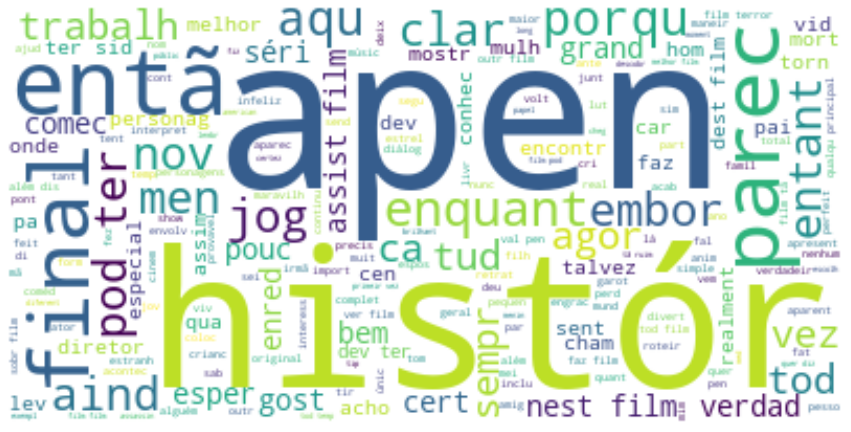

In [14]:
text = " ".join(i for i in df.clean_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# with open("clean_txt.txt", "w") as output:
#     output.write(str(df.clean_text.to_list()))
    
    
with open('clean_txt.txt', 'w') as file:
    for item in df.clean_text.to_list():
        file.write("%s\n" % item)

In [21]:
with open('clean_txt.txt', 'r') as file:
    result_list = file.read().splitlines()

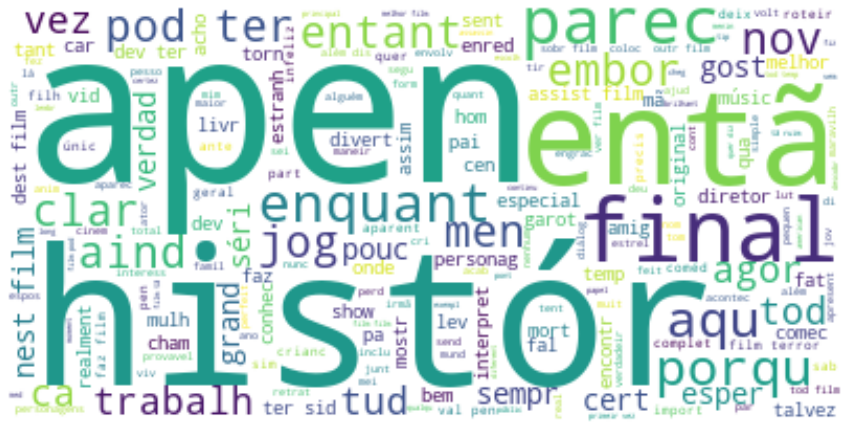

In [27]:
text = " ".join(i for i in result_list)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()